# Wine Case Analysis: *Wine Spectator*'s Top 100 Wines, 1988-2020
List available online on *Wine Spectator*'s [Top 100 Lists web site](https://top100.winespectator.com/lists/).

## File Setup

In [330]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# import Geopy packages
import geopy
from geopy.geocoders import Nominatim

In [331]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe Exploration

In [332]:
# Note: save CSV files in UTF-8 format to preserve special characters.
df_Wine_00 = pd.read_csv('./Wine_Hier00.csv')
df_Wine_01 = pd.read_csv('./Wine_Hier01.csv')
df_GeoCache = pd.read_csv('./GeoCache.csv')
df_Flag = pd.read_csv('./emoji_list.csv')

In [333]:
df_Wine_00.shape

(3301, 25)

In [334]:
df_Wine_00 = df_Wine_00.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_00.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [335]:
df_Wine_01 = df_Wine_01.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_01.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [336]:
df_Wine_01.shape

(3301, 25)

In [337]:
df_Wine_01.shape

(3301, 25)

In [338]:
# CSV of wines is retaining a blank row at the end of the dataset. Remove the last row to prevent data type errors.

# number of rows to drop
n = 1

df_Wine_00.drop(df_Wine_00.tail(n).index, inplace = True)
df_Wine_01.drop(df_Wine_01.tail(n).index, inplace = True)

In [339]:
# Review_Year
# Convert Review_Year from float to int
df_Wine_00['Review_Year'] = df_Wine_00['Review_Year'].astype(int)
df_Wine_01['Review_Year'] = df_Wine_01['Review_Year'].astype(int)

In [340]:
df_GeoCache.shape

(1224, 8)

In [341]:
df_Flag.shape

(19, 3)

In [342]:
df_Wine_00.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_from,Best_Drink_Through,Review,Hierarchy,Address,loc,point,Latitude,Longitude,altitude
111,2019,12,2016,96.0,47,Carlisle,Zinfandel Russian River Valley Papera Ranch,Red,Zinfandel,NaN,...,2019.0,2027.0,"A stunning wine, jammed with fruit and persona...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
2637,1994,38,1992,92.0,23,Byron,Chardonnay Santa Barbara County Reserve,White,Chardonnay,NaN,...,1994.0,NaN,An outstanding reserve-style wine that comes a...,Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1948,2001,49,1994,91.0,23,Bodegas Montecillo,Rioja Gran Reserva,Red,Rioja,NaN,...,2001.0,2010.0,Lovely. This youthful red is both elegant and ...,Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0
599,2015,100,2012,94.0,113,Sadie Family,Palladius Swartland,White,Blend,"Chenin Blanc, Roussanne, Grenache Blanc, Sémil...",...,2015.0,2022.0,"Intense, with ripe, lush layers of creamed Jon...",Hierarchy_00,South Africa,South Africa,"(-28.8166236, 24.991639, 0.0)",-28.816624,24.991639,0.0
1468,2006,69,2004,90.0,15,Churchill,Douro Churchill Estates,Red,Blend,Tinta Roriz (Aragonez) – Touriga,...,2006.0,2012.0,"Very pure-tasting, with an impressive array of...",Hierarchy_00,Portugal,Portugal,"(40.0332629, -7.8896263, 0.0)",40.033263,-7.889626,0.0
1274,2008,75,2007,90.0,19,Suavia,Soave Classico,White,Garganega,NaN,...,2008.0,NaN,"Lots of lemon, white peach and mineral charact...",Hierarchy_00,Italy,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297,0.0
663,2014,64,2013,90.0,15,Cune,Rioja White Monopole,White,Rioja,NaN,...,2014.0,2017.0,"This focused white shows bright, juicy flavors...",Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0
2462,1996,63,1994,91.0,16,Robert Mondavi,Zinfandel Napa Valley,Red,Zinfandel,NaN,...,1996.0,NaN,A well-mannered Zin that captures the wild ber...,Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
415,2016,16,2013,96.0,41,Château Coutet,Barsac,Dessert & Fortified,Semillon,NaN,...,2018.0,2038.0,"Unctuous and ripe, showing mouthfilling flavor...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
1516,2005,17,2003,95.0,75,Beaux Frères,Pinot Noir Willamette Valley The Beaux Frères ...,Red,Pinot Noir,NaN,...,2005.0,2015.0,Subtle and graceful. Remarkably generous with ...,Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0


## Pivot on Address

### Hierarchy 00

In [343]:
# Count by Wine Style by Address - All Years
df_Count_WS_All_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_All_00.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
26,Sparkling,France,46.603354,1.888333,52
44,White,Ukraine,49.487197,31.271832,1
38,White,Italy,42.638426,12.674297,50
13,Red,Germany,51.083420,10.423447,1
12,Red,France,46.603354,1.888333,528
23,Red,Uruguay,-32.875555,-56.020153,2
10,Red,Austria,47.200034,13.199959,1
20,Red,South Africa,-28.816624,24.991639,22
3,Dessert & Fortified,Hungary,47.181759,19.506094,9
25,Rosé | Rosado,USA,39.783730,-100.445882,2


In [344]:
# Count by Wine Style - By Review Year
df_Count_WS_ByYear_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Review_Year', 'Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_ByYear_00.sample(10)

,Review_Year,Wine_Style,Address,Latitude,Longitude,Count
574,2018,White,USA,39.783730,-100.445882,7
226,2003,White,Italy,42.638426,12.674297,1
315,2008,Red,Australia,-24.776109,134.755000,4
240,2004,Red,USA,39.783730,-100.445882,23
337,2009,Red,Chile,-31.761336,-71.318770,2
438,2013,Rosé | Rosado,France,46.603354,1.888333,1
467,2014,White,New Zealand,-41.500083,172.834408,1
119,1997,Red,Chile,-31.761336,-71.318770,1
218,2003,Red,Portugal,40.033263,-7.889626,1
582,2019,Red,New Zealand,-41.500083,172.834408,1


### Hierarchy 01

In [345]:
# Count by Wine Style - All Years
df_Count_All_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_All_01.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
136,White,"New York, USA",40.712728,-74.006015,8
141,White,"Péloponnèse, Greece",37.363328,22.239537,1
106,White,"Burgenland, Austria",47.500000,16.416667,1
40,Red,"Estremadura, Lisboa, Portugal",38.635382,-9.042714,1
39,Red,"Emilia-Romagna, Italy",44.525696,11.039437,1
147,White,"Sicilia, Italy",37.587794,14.155048,5
34,Red,"Choapa Valley, Chile",-31.728012,-71.208068,1
67,Red,"Rhône, France",45.880235,4.564534,167
41,Red,"Extremadura, Spain",39.174843,-6.152989,2
35,Red,"Colchagua Valley, Chile",-34.548228,-71.401319,20


In [346]:
# Count by Wine Style - By Review Year
df_Count_ByYear_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Review_Year', 'Address', 'Latitude', 'Longitude'])['Score'].count()}).reset_index()
df_Count_ByYear_01.sample(10)

,Review_Year,Address,Latitude,Longitude,Count
625,2013,"Andalucia, Spain",37.339996,-4.581161,1
245,2001,"Maipo Valley, Chile",-33.732865,-70.781236,1
889,2019,"Rioja, Spain",42.281464,-2.482805,2
379,2005,"Tuscany, Italy",43.458654,11.138920,7
109,1994,"South Australia, Australia",-30.534366,135.630121,3
373,2005,"Rhône, France",45.880235,4.564534,8
283,2003,"Alsace, France",48.249176,7.407470,2
616,2012,"Savoie, France",45.494895,6.384660,1
779,2016,"Western Cape, South Africa",-33.546977,20.727530,1
749,2016,"Castilla y León, Spain",41.803717,-4.747173,4


## Map Results: World Map
Plot count results at Hierarchy 00 on world map.
### Import Shapefile
* See [World Map Units, 1:10 million (2012)](https://geo.nyu.edu/catalog/stanford-gj285pj7891) from the NYU Spatial Data Repository.
* See [GeoPandas 101: Plot any data with a latitude and a longitude on a map](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972).

In [347]:
world_map = gpd.read_file('./shapefiles/world/gj285pj7891.shp')

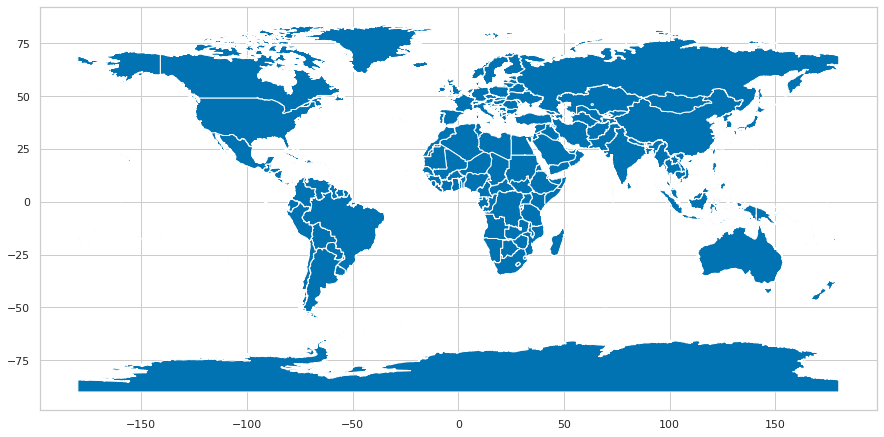

In [348]:
fig, ax = plt.subplots(figsize = (15, 15))
world_map.plot(ax = ax)

In [349]:
# Define a coordinate reference system (CRS)
crs = {'init': 'espg:4326'}

## Plot Counts by Hierarchy 00 (Country) by Wine Style

In [350]:
def count_style_country(wine_style, color):    
    df = df_Count_WS_All_00[(df_Count_WS_All_00.Wine_Style == wine_style)]

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (15, 15))
    
    world_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'], color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by Country\nReview Years 1988-2020')
    
    plt.savefig('./images/count_scores_by_country_' + wine_style + '.png')

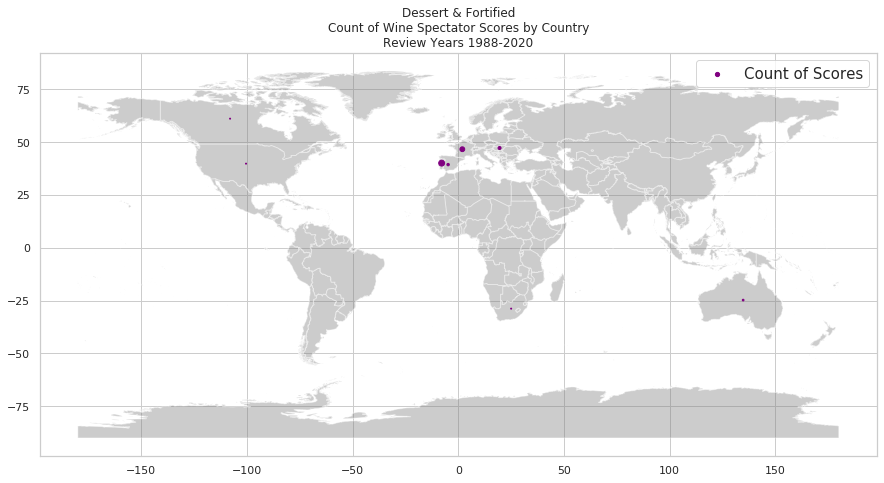

In [351]:
count_style_country('Dessert & Fortified', 'purple')

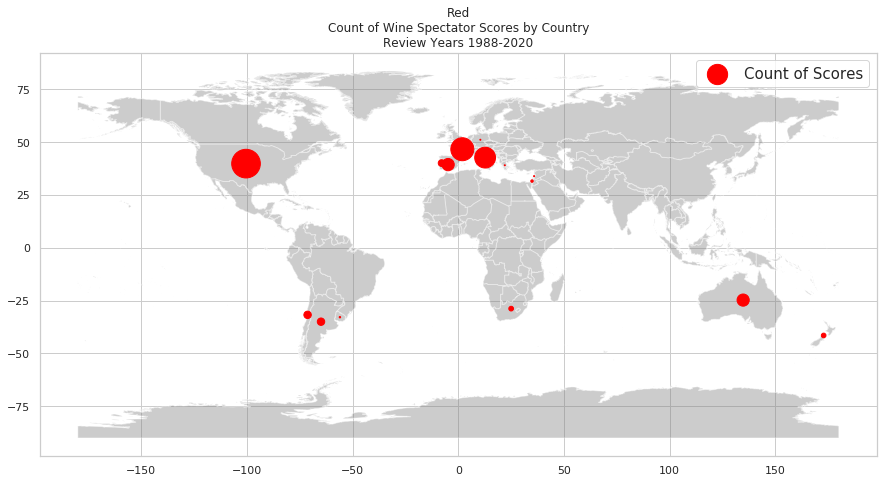

In [352]:
count_style_country('Red', 'red')

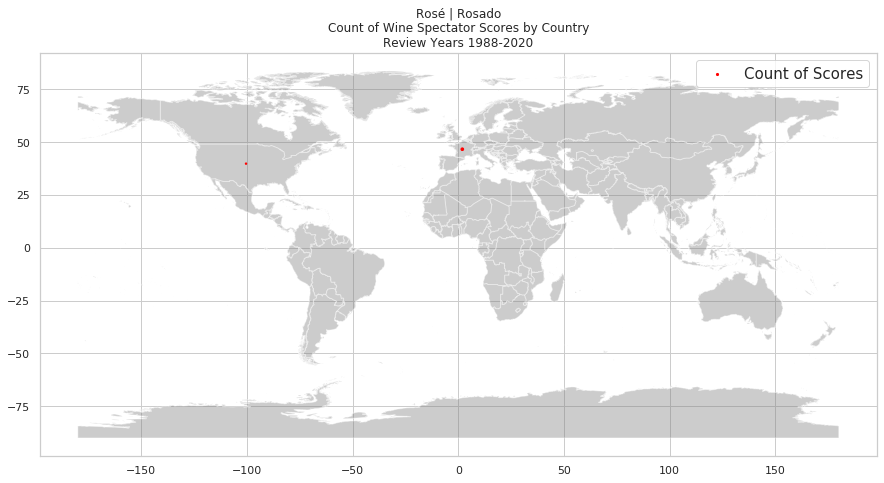

In [353]:
count_style_country('Rosé | Rosado', 'red')

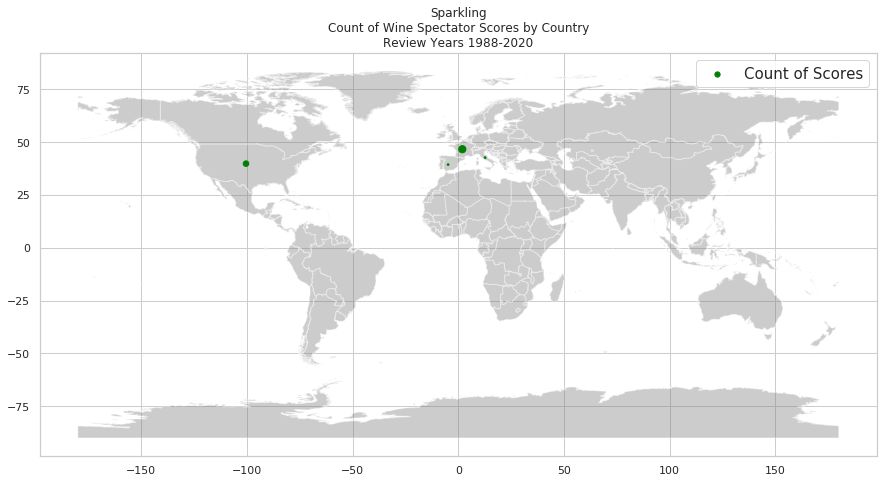

In [354]:
count_style_country('Sparkling', 'green')

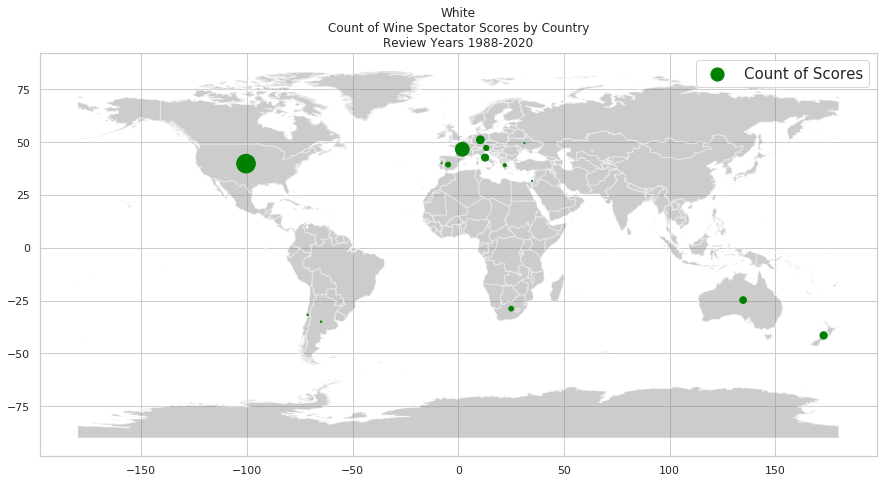

In [355]:
count_style_country('White', 'green')

## Plot Counts by Hierarchy 01 (within Country)

In [356]:
# import country maps
usa_map = gpd.read_file('./shapefiles/USA/vw421bb8115.shp')
france_map = gpd.read_file('./shapefiles/France/ym781wr7170.shp')
italy_map = gpd.read_file('./shapefiles/Italy/bb489fv3314.shp')

In [357]:
def count_style_subcountry(wine_style, country):    
    df = df_Count_All_01[
        (df_Count_All_01.Wine_Style == wine_style) &
        (df_Count_All_01.Address.str.contains(country) == True)
    ]
    
    if country == 'USA':
        country_map = usa_map
        bounds = 'State'
    elif country == 'France':
        country_map = france_map
        bounds = 'First-Level Administrative Division'
    elif country == 'Italy':
        country_map = italy_map
        bounds = 'First-Level Administrative Division'
    else:
        print('select USA, France, or Italy as country')
        
    if wine_style == 'Dessert & Fortified':
        color = 'purple'
    elif wine_style == 'Red':
        color = 'red'
    elif wine_style == 'Rosé | Rosado':
        color = 'red'
    elif wine_style == 'Sparkling':
        color = 'green'
    elif wine_style == 'White':
        color = 'green'
    

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (10, 10))
    
    if country == 'USA':
        ax.set(xlim = (-130, -60), ylim = (20, 55))
    
    country_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'] * 3, color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by ' + bounds +'\nReview Years 1988-2020')
    
    fig.savefig('./images/count_scores_by_' + country + '_' + wine_style + '.png')

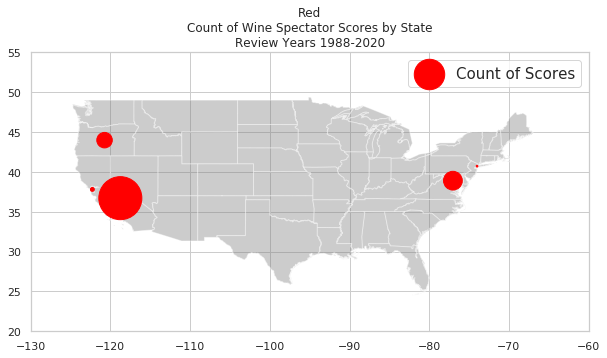

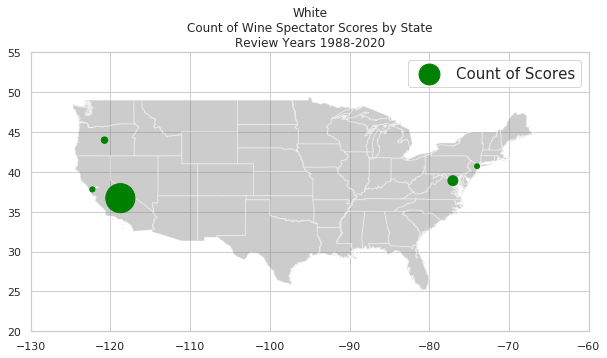

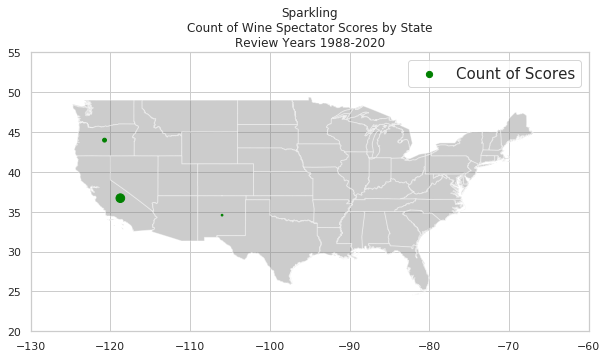

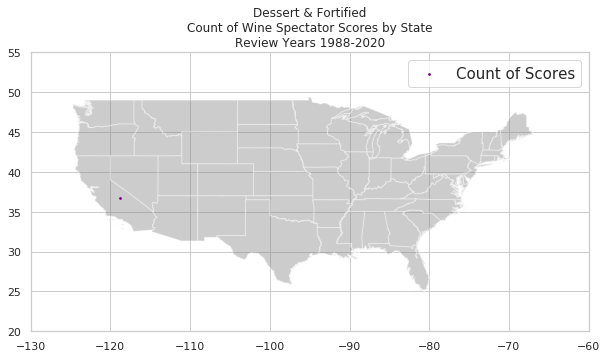

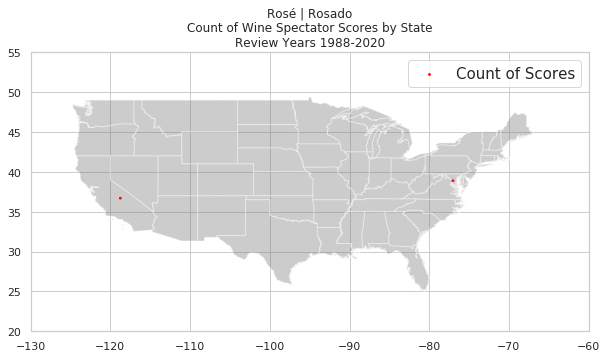

In [358]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'USA')

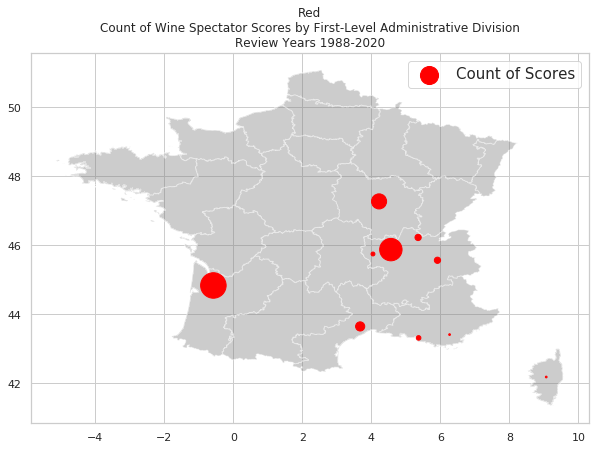

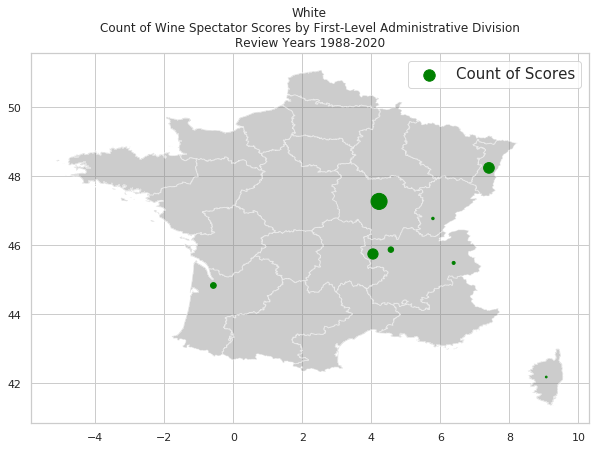

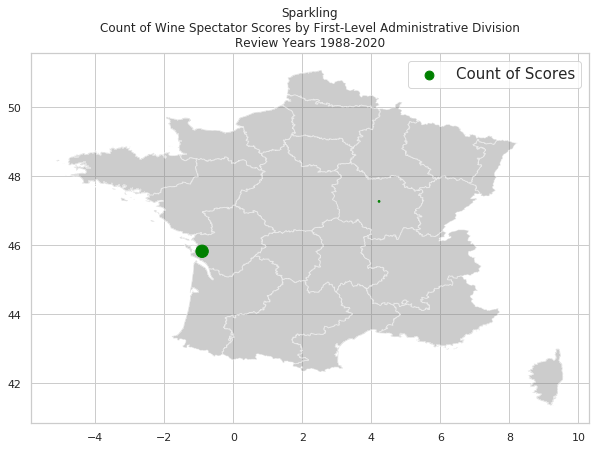

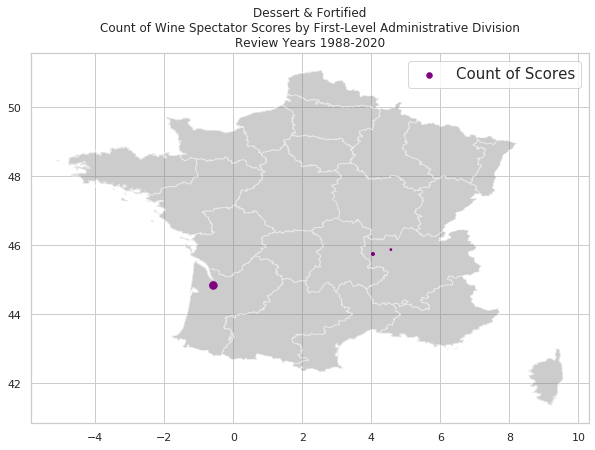

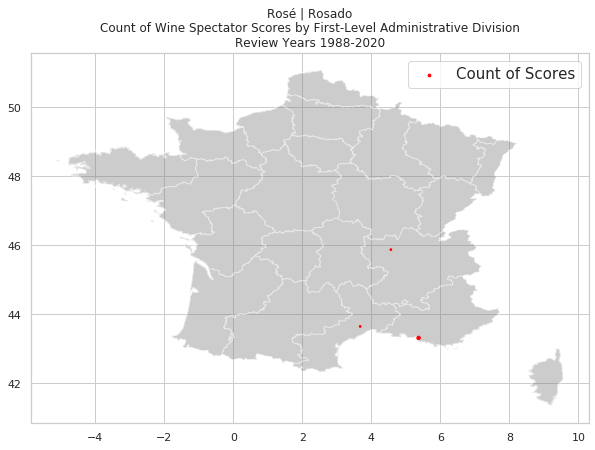

In [359]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'France')

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.
/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.


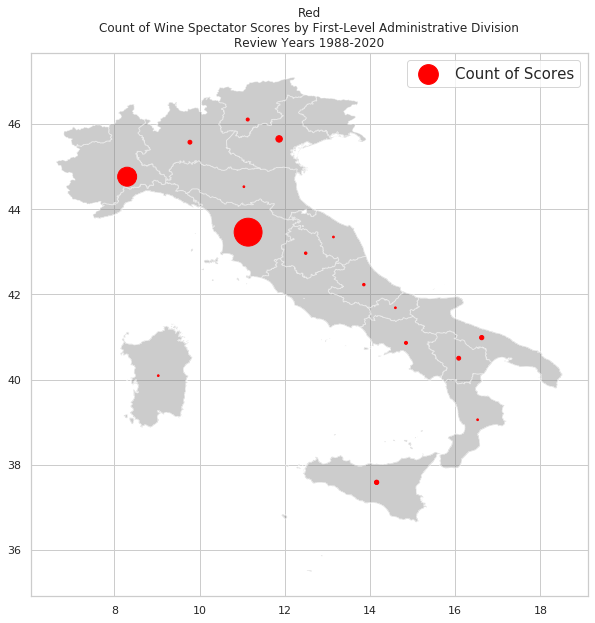

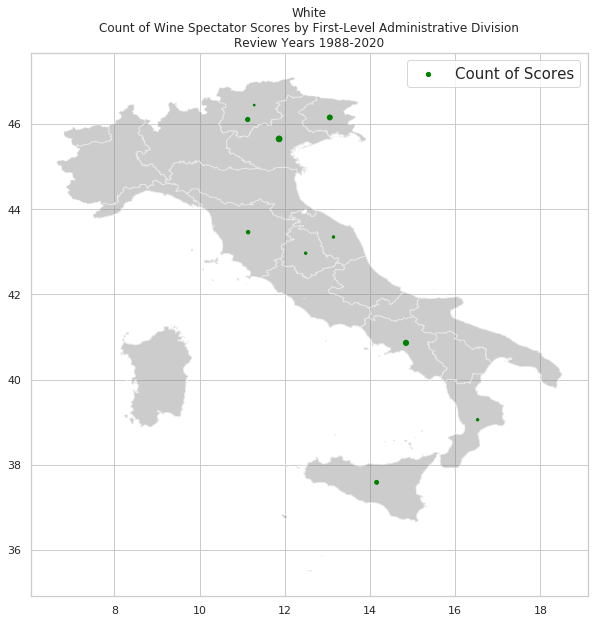

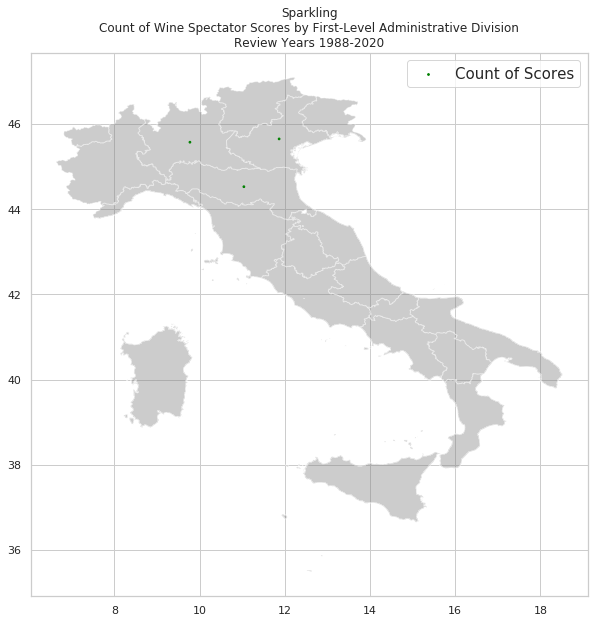

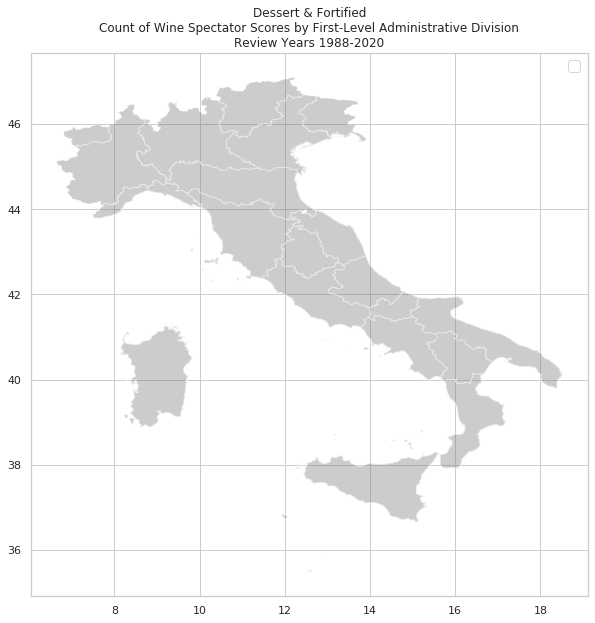

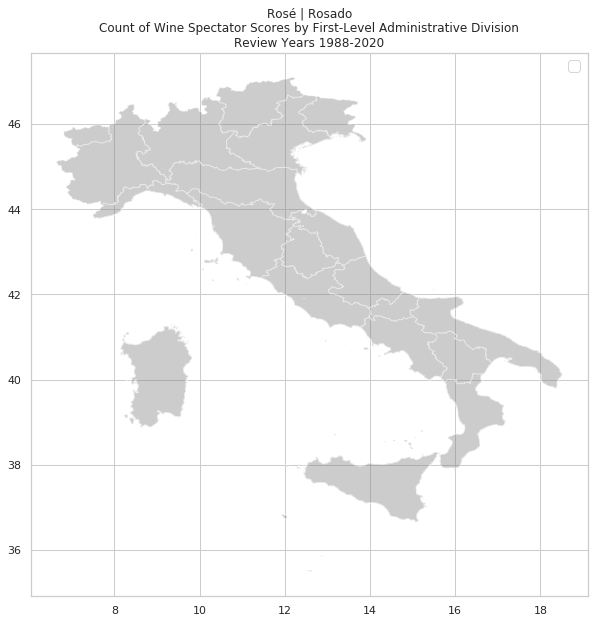

In [360]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'Italy')